# E-tivity 3: Linear regression
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.utils import shuffle
import pandas as pd

# Task 4  (CE6002)
#### *Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.*
  

In [3]:
# Load the data
data = pd.read_csv("Task4.csv") 

In [4]:
data.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [5]:
data.describe()

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [6]:
def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    return w_lin


def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 


def calc_errors(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return e_sq/N , math.sqrt(e_sq/N) 


def calculate_and_plot_linear_regression(X, y):
    
    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], y, c=y)

    # Plot decision boundary
    minx = np.amin(X)
    maxx = np.amax(X)  
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(weights, x_line)
    plt.plot(x_line, y_line)
    
    # yhat 
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], yhat, c="black")
    
    # error
    mse, rmse = calc_errors(y_test,  yhat)
    
    # Marker for center point at coordinates (0,0)
    plt.plot([0], [0], marker='x', markersize=30, color="red")

    print("weights:", weights)
    print("RMSE   :", rmse)
    print("MSE    :", mse)

    return weights, yhat, mse, rmse


### Linear regression on X

weights: [0.40020625 0.78768555]
RMSE   : 0.31209137924705527
MSE    : 0.09740102900032929


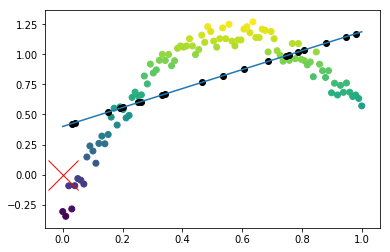

In [7]:
myX = data['X'].values
myY = data['y'].values

bias = np.ones(len(myX))
newX =  np.vstack((bias,myX))
newXt = newX.T

weights, yhat, mse, rmse = calculate_and_plot_linear_regression(newXt, myY.T)


### Linear regression on X,X square

bias.shape : (100,)
newX.shape : (2, 100)
newX2.shape: (3, 100)
weights: [-0.27898341  4.87767293 -4.09764044]
RMSE   : 0.07732257093813867
MSE    : 0.005978779976483487


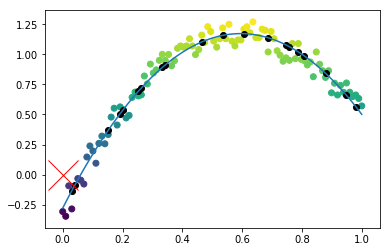

In [8]:
myX = data['X'].values
myY = data['y'].values

myX2 = np.square(myX)
myY2 = np.square(myY)

bias = np.ones(len(myX))
newX =  np.vstack((bias,myX))
newX2 =  np.vstack((newX,myX2))

print("bias.shape :", bias.shape)
print("newX.shape :", newX.shape)
print("newX2.shape:", newX2.shape)
newXt = newX2.T

weights, yhat, mse, rmse = calculate_and_plot_linear_regression(newXt, myY.T)


The **misclassifiacation error is very low at 0.07** when using a **Xsquare in combination with X**.

Reference: https://github.com/pickus91/Polynomial-Regression-From-Scratch/blob/master/polynomial_regression.py 

The misclassification error is **high at 31%**

#### *Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.*

Score: 0.4645382880058122


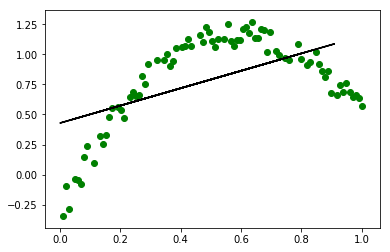

RMSE   : 0.3058404917324385
MSE    : 0.09353840638313977


In [9]:
# LinearRegression expects an array of shape (n, 1) for the "Training data"
newX = data['X'].values[:,np.newaxis]

# target data is array of shape (n,) 
newy = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)
score = model2.score(X_test, y_test)

plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, model2.predict(X_test),color='k')

print("Score:", score)
plt.show()

# Calculate MSE and RMSE
mse, rmse = calc_errors(y_test, model2.predict(X_test))
print("RMSE   :", rmse)
print("MSE    :", mse)


score X_poly_train  : 0.0
score X_poly_test   : -0.025927010954068352

y_test
RMSE   : 0.4233397064138473
MSE    : 0.17921650702656244


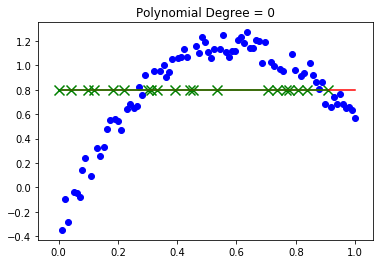

score X_poly_train  : 0.2972959653601095
score X_poly_test   : 0.4645382880058121

y_test
RMSE   : 0.3058404917324385
MSE    : 0.09353840638313979


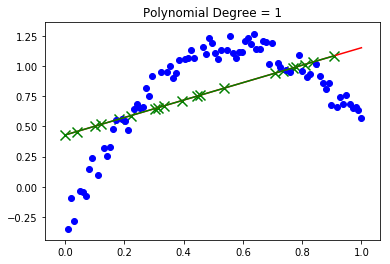

score X_poly_train  : 0.9663299739178789
score X_poly_test   : 0.97212010806258

y_test
RMSE   : 0.06978728698192431
MSE    : 0.004870265424297462


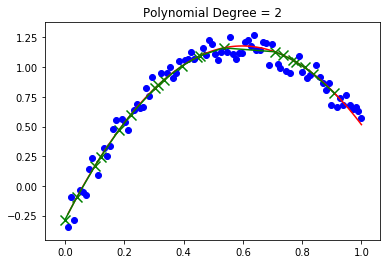

score X_poly_train  : 0.97075786098124
score X_poly_test   : 0.9739041873924374

y_test
RMSE   : 0.06751747382005256
MSE    : 0.004558609271041483


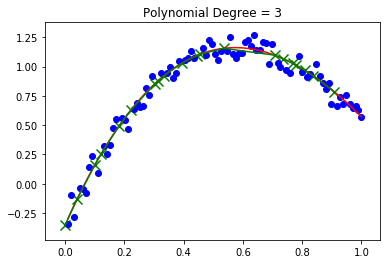

score X_poly_train  : 0.9711650984985819
score X_poly_test   : 0.9762691838160532

y_test
RMSE   : 0.06438535726091218
MSE    : 0.004145474229615298


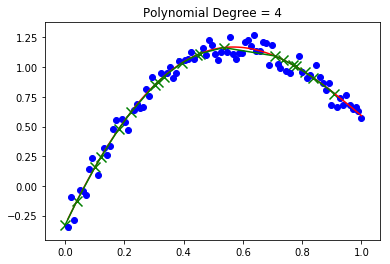

score X_poly_train  : 0.971203933144438
score X_poly_test   : 0.9762403617758693

y_test
RMSE   : 0.06442444471202942
MSE    : 0.004150509076453336


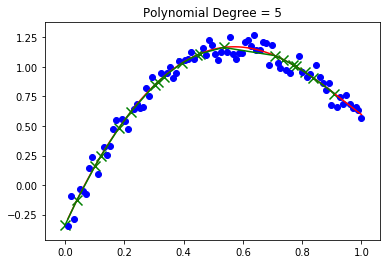

score X_poly_train  : 0.9712077634477836
score X_poly_test   : 0.9762393031370443

y_test
RMSE   : 0.06442587994976565
MSE    : 0.004150694007301615


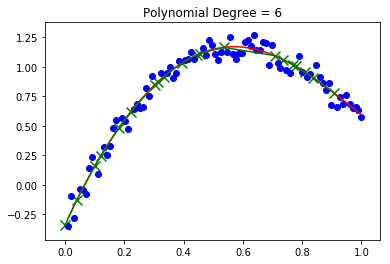

score X_poly_train  : 0.971269434708709
score X_poly_test   : 0.9759514441507837

y_test
RMSE   : 0.0648149623230578
MSE    : 0.004200979340939403


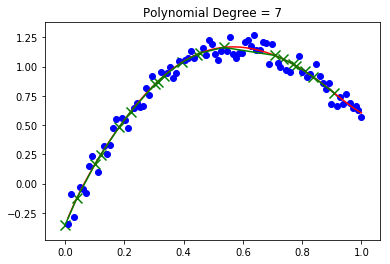

score X_poly_train  : 0.9712821875984006
score X_poly_test   : 0.9760781895893035

y_test
RMSE   : 0.06464393638763698
MSE    : 0.004178838511688857


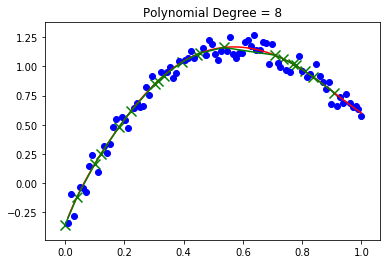

score X_poly_train  : 0.9712847638759495
score X_poly_test   : 0.9761255265121983

y_test
RMSE   : 0.06457994540413749
MSE    : 0.004170569348401379


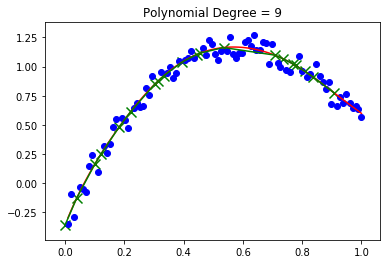

score X_poly_train  : 0.9713434250192656
score X_poly_test   : 0.9773231905182649

y_test
RMSE   : 0.06293927672561571
MSE    : 0.003961352554743632


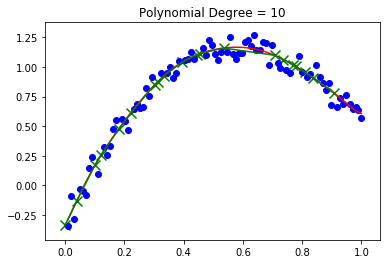

score X_poly_train  : 0.9715124191789529
score X_poly_test   : 0.9784727559145481

y_test
RMSE   : 0.06132322546526971
MSE    : 0.0037605379814643026


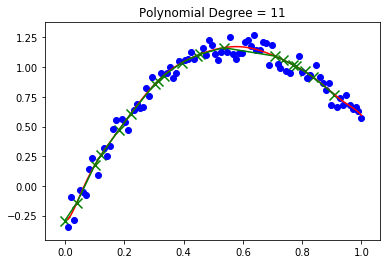

score X_poly_train  : 0.9732203991896956
score X_poly_test   : 0.9703868285989907

y_test
RMSE   : 0.07192390062936457
MSE    : 0.00517304748174271


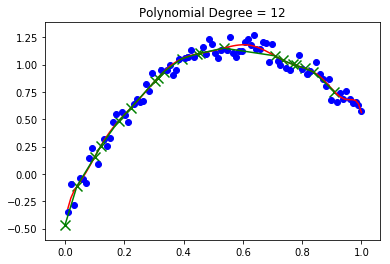

score X_poly_train  : 0.9735134716991947
score X_poly_test   : 0.9738964676577817

y_test
RMSE   : 0.06752745968347623
MSE    : 0.004559957811303509


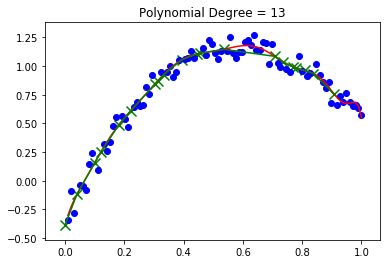

score X_poly_train  : 0.973553788901003
score X_poly_test   : 0.9744784139454168

y_test
RMSE   : 0.06677049599895186
MSE    : 0.004458299135946048


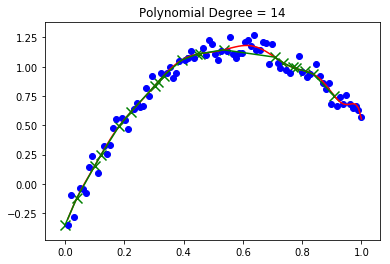

score X_poly_train  : 0.9753449910537023
score X_poly_test   : 0.9400475690095533

y_test
RMSE   : 0.10233735100441585
MSE    : 0.010472933410601014


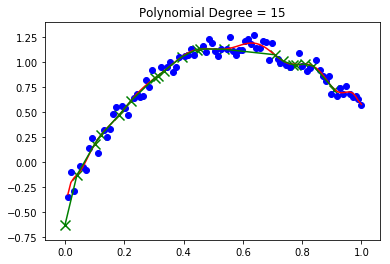

score X_poly_train  : 0.975693955864096
score X_poly_test   : 0.9618520428850411

y_test
RMSE   : 0.08163312368147499
MSE    : 0.006663966881994993


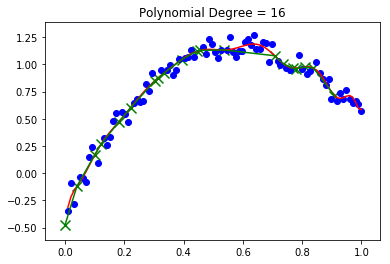

score X_poly_train  : 0.9757240709884187
score X_poly_test   : 0.9663057654481294

y_test
RMSE   : 0.07671999565112624
MSE    : 0.0058859577327088275


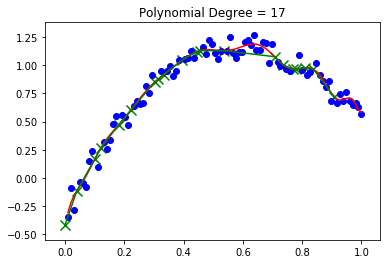

score X_poly_train  : 0.9772681770174103
score X_poly_test   : 0.8627094336910811

y_test
RMSE   : 0.1548642310264996
MSE    : 0.02398293005142904


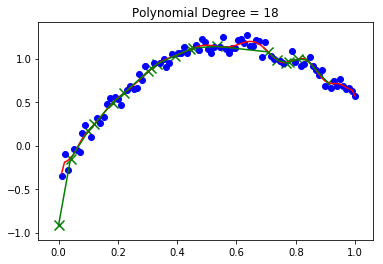

score X_poly_train  : 0.9788680643540361
score X_poly_test   : 0.4981219143232465

y_test
RMSE   : 0.29609419196210945
MSE    : 0.08767177051369451


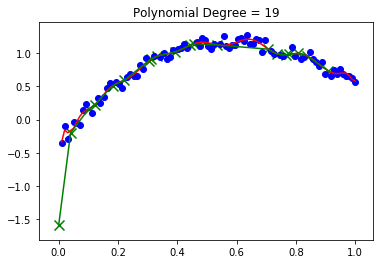

score X_poly_train  : 0.9800862113953903
score X_poly_test   : -0.264227136233703

y_test
RMSE   : 0.4699409886596047
MSE    : 0.2208445328223667


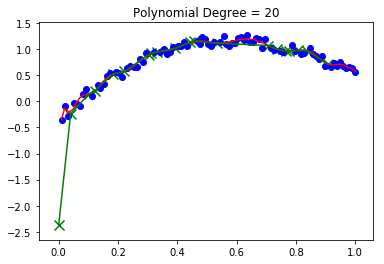

score X_poly_train  : 0.9801285870143631
score X_poly_test   : -0.04664706308438471

y_test
RMSE   : 0.42759330999907985
MSE    : 0.18283603875596918


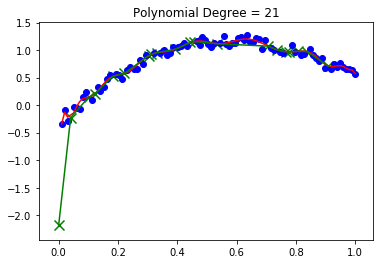

score X_poly_train  : 0.9801271748845863
score X_poly_test   : -0.05590369276998075

y_test
RMSE   : 0.4294799822951063
MSE    : 0.18445305519220484


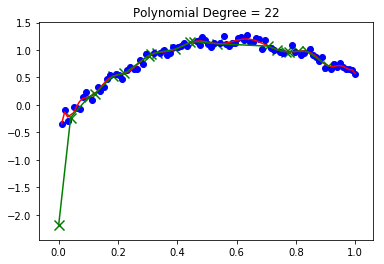

score X_poly_train  : 0.9801136944733544
score X_poly_test   : 0.023776042908945416

y_test
RMSE   : 0.4129576376664441
MSE    : 0.17053401050705014


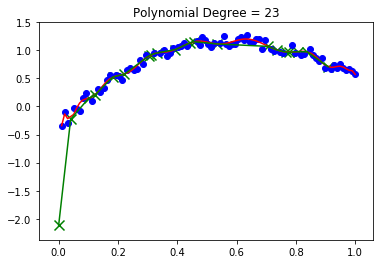

score X_poly_train  : 0.9802379283943802
score X_poly_test   : -0.33836035402596143

y_test
RMSE   : 0.48352318538051353
MSE    : 0.23379467080051847


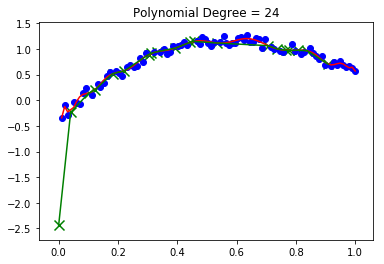

score X_poly_train  : 0.9802786364908862
score X_poly_test   : -0.306084408643031

y_test
RMSE   : 0.47765727283722553
MSE    : 0.2281564702942957


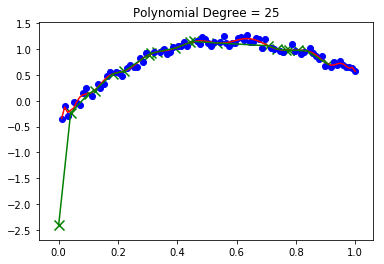

score X_poly_train  : 0.9803170537827064
score X_poly_test   : -0.2383186840122593

y_test
RMSE   : 0.4651006912995083
MSE    : 0.21631865304728054


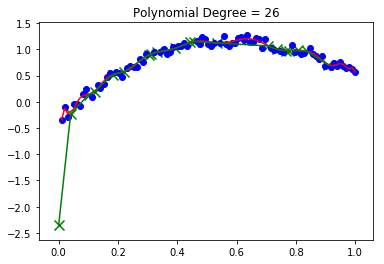

score X_poly_train  : 0.9803248652951179
score X_poly_test   : -0.054891666460768596

y_test
RMSE   : 0.4292741163434142
MSE    : 0.1842762669624191


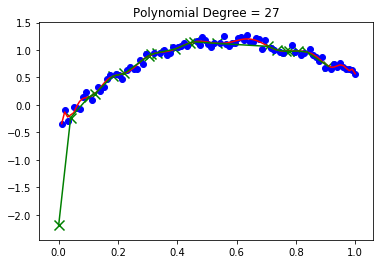

score X_poly_train  : 0.9803256964443167
score X_poly_test   : -0.17467703575047455

y_test
RMSE   : 0.45299145678239683
MSE    : 0.2052012599178381


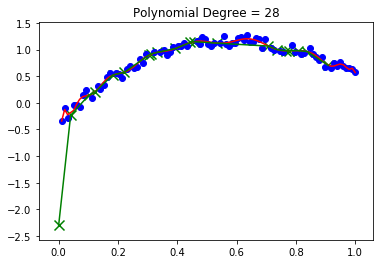

score X_poly_train  : 0.9803439949145861
score X_poly_test   : -0.26442612760906203

y_test
RMSE   : 0.469977971936367
MSE    : 0.22087929410542056


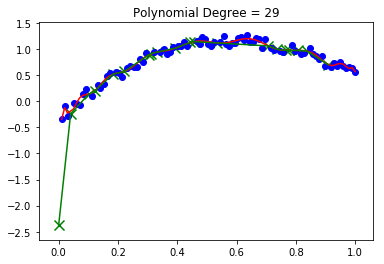

score X_poly_train  : 0.9807659160286188
score X_poly_test   : 0.491379078311428

y_test
RMSE   : 0.298076599057922
MSE    : 0.08884965890593718


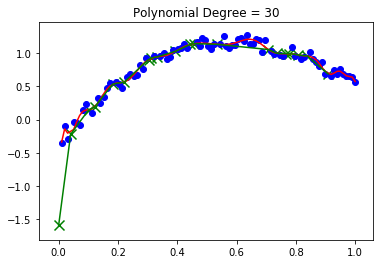

score X_poly_train  : 0.9808478100701765
score X_poly_test   : 0.42037400029316874

y_test
RMSE   : 0.3182033160201104
MSE    : 0.10125335032619427


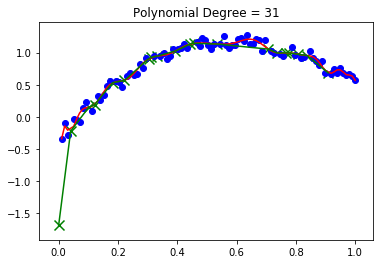

score X_poly_train  : 0.9809175521770472
score X_poly_test   : 0.3528399439001434

y_test
RMSE   : 0.33623012663130925
MSE    : 0.11305069805450625


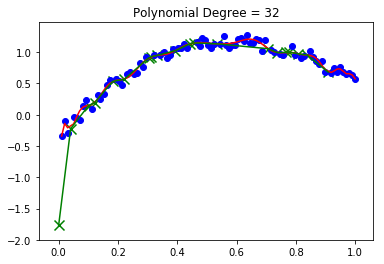

score X_poly_train  : 0.6667166922164612
score X_poly_test   : 0.699405201468046

y_test
RMSE   : 0.22915086598748102
MSE    : 0.05251011938281249


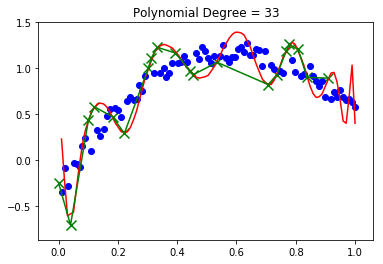

score X_poly_train  : 0.817687850324377
score X_poly_test   : 0.7661509547170635

y_test
RMSE   : 0.2021150124793585
MSE    : 0.04085047826953125


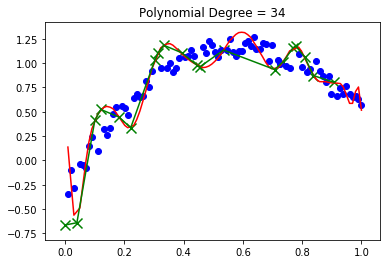

score X_poly_train  : 0.7567651978248592
score X_poly_test   : 0.06730179131320868

y_test
RMSE   : 0.40364664166343794
MSE    : 0.16293061132617187


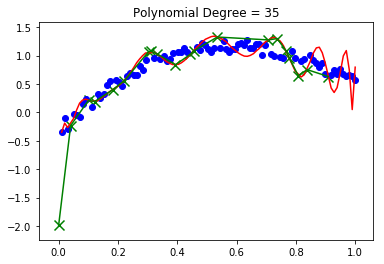

score X_poly_train  : 0.25439471539724534
score X_poly_test   : -1.8738577111147459

y_test
RMSE   : 0.7085384175942975
MSE    : 0.5020266892070311


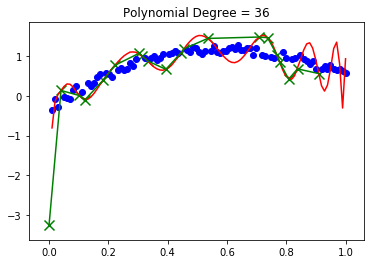

score X_poly_train  : 0.2383933233125276
score X_poly_test   : -2.3755151431021817

y_test
RMSE   : 0.7678931659447736
MSE    : 0.5896599143046877


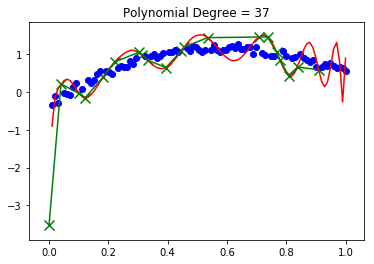

score X_poly_train  : 0.39360393331576576
score X_poly_test   : -2.1124339034087383

y_test
RMSE   : 0.7373621501187421
MSE    : 0.5437029404277344


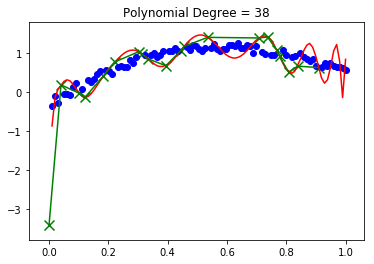

score X_poly_train  : 0.8928403676778061
score X_poly_test   : 0.5403624479652047

y_test
RMSE   : 0.2833599868350508
MSE    : 0.08029288213916017


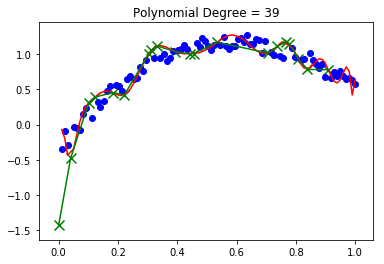

score X_poly_train  : 0.8831128025733682
score X_poly_test   : 0.6347426373387157

y_test
RMSE   : 0.2525982059234431
MSE    : 0.06380585363574218


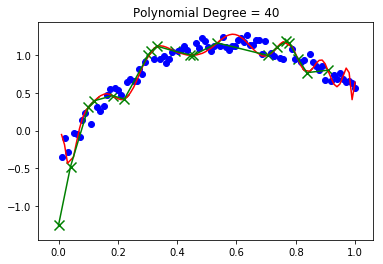

score X_poly_train  : 0.8276967065584068
score X_poly_test   : -0.9816801839368143

y_test
RMSE   : 0.5883659828569316
MSE    : 0.3461745297832032


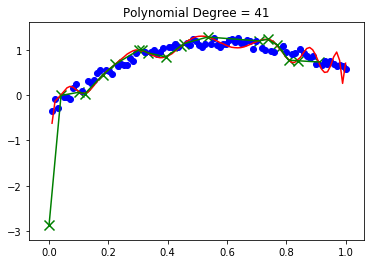

score X_poly_train  : 0.8547401549964943
score X_poly_test   : 0.6604003751474702

y_test
RMSE   : 0.2435647152316184
MSE    : 0.05932377050585937


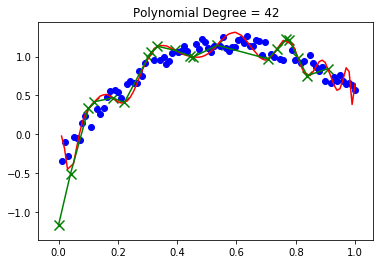

score X_poly_train  : 0.7119211923920914
score X_poly_test   : 0.6891400239415664

y_test
RMSE   : 0.2330307198725028
MSE    : 0.054303316404296864


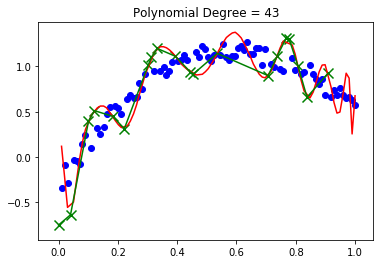

score X_poly_train  : 0.8132746302055854
score X_poly_test   : 0.6846464498813142

y_test
RMSE   : 0.23470894126006764
MSE    : 0.05508828710742188


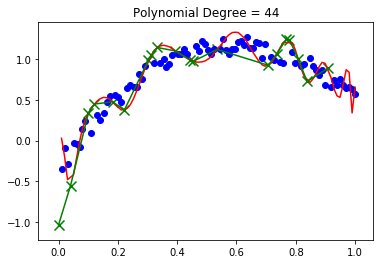

score X_poly_train  : 0.7780237139599533
score X_poly_test   : 0.7487286979150798

y_test
RMSE   : 0.2095087748898823
MSE    : 0.04389392675585937


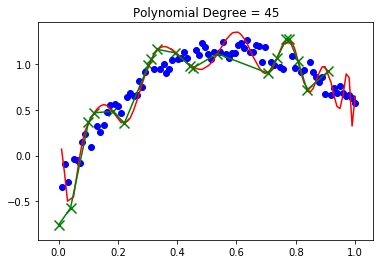

score X_poly_train  : 0.7476222098747294
score X_poly_test   : 0.746933820282816

y_test
RMSE   : 0.21025572343298557
MSE    : 0.044207469236328116


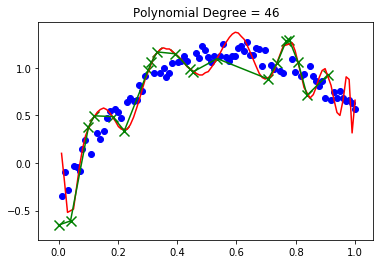

score X_poly_train  : 0.3860413219511113
score X_poly_test   : 0.4067816654274331

y_test
RMSE   : 0.32191265859495466
MSE    : 0.10362775976367185


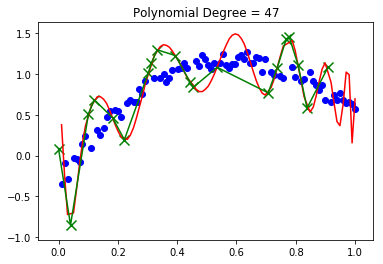

score X_poly_train  : 0.7247228220297253
score X_poly_test   : 0.7295527433491111

y_test
RMSE   : 0.21735621481600342
MSE    : 0.04724372411914062


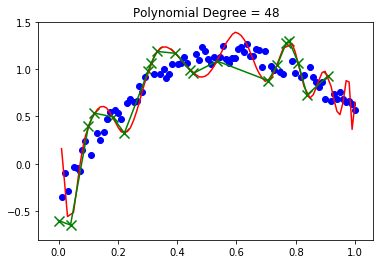

score X_poly_train  : 0.7620610908812686
score X_poly_test   : 0.7475621818873492

y_test
RMSE   : 0.209994529430233
MSE    : 0.04409770239062499


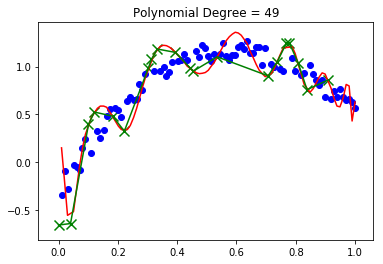

score X_poly_train  : 0.8525099394178264
score X_poly_test   : 0.7438853500338815

y_test
RMSE   : 0.21151831725220188
MSE    : 0.044739998533203124


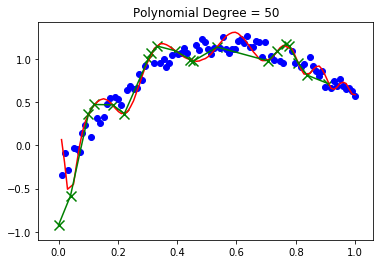

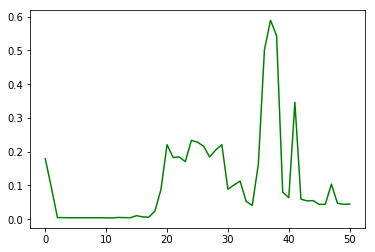

In [10]:
# Reference: 
# https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
# https://www.jeremyjordan.me/polynomial-regression/

degree = 2
def run_experiement(degree):
    
    # BUG!!!  Need to bring this to the power of "degree" instead of 2.
    #y2_train = y_train**2
    #y2_test = y_test**2
    
    #y2_train = math.pow(y_train, 2)
    #y2_test = math.pow(y_test, 2)
    
    y2_train = y_train
    y2_test = y_test
    

    # create polynomials
    poly_features_train = PolynomialFeatures(degree)  
    poly_features_test = PolynomialFeatures(degree)  

    # Test this when just calling fit, not fit_transform
    X_poly_train = poly_features_train.fit_transform(X_train)
    X_poly_test = poly_features_test.fit_transform(X_test)

    # create linear regression
    poly_model = LinearRegression()  
    poly_model.fit(X_poly_train, y2_train)

    # score and predict using training data.
    # question: should we run the score against y_train or y2_train?
    score_train = poly_model.score(X_poly_train, y2_train)
    pred_train = poly_model.predict(X_poly_train)
    print("score X_poly_train  :", score_train)

    # score and predict using testing data
    # question: should we run the score against y_train or y2_train?
    score_test = poly_model.score(X_poly_test, y2_test)
    pred_test = poly_model.predict(X_poly_test)
    print("score X_poly_test   :", score_test)

    # Calculate MSE and RMSE 
    mse, rmse = calc_errors(y_test, pred_test)
    print("\ny_test")
    print("RMSE   :", rmse)
    print("MSE    :", mse)

    new_X_train, new_y_train = zip(*sorted(zip(X_train, pred_train))) # sort values for plotting
    new_X_test, new_y_test = zip(*sorted(zip(X_test, pred_test))) # sort values for plotting

    # plot training data
    plt.plot(new_X_train, new_y_train, c='red')

    # plot testing data (draw a curve, then add X markers for each testing sample)
    plt.plot(new_X_test, new_y_test, c='green')
    plt.scatter(new_X_test, new_y_test, marker='x', s=100, c="green")

    # plot original data
    plt.scatter(X_train, y_train, c='blue')

    # plot data raised to the chosen power (2)
    #plt.scatter(X_train, y2_train, c='orange')

    plt.title("Polynomial Degree = "+ str(degree))
    plt.show()

    return mse, rmse

mses = []
rmses = []
max_degree = 50
for i in range(max_degree +1):
    mse, rmse = run_experiement(i)
    mses.append(mse)
    rmses.append(rmse)


# Plot errors with a view to find an elbow.
degrees = np.linspace(0, max_degree, max_degree+1)
plt.plot(degrees, mses, c='green')



IMPORTANT: The MSE is calcualted on the test data.
#### Observations
  * For the polynomial of degree 0 and 1 we notice a very high error value which is expected. The model is too simple and is clearly **underfitting**.
  * We can see that the **lowest error** is obtained when the **second degree polynomial** is used and remains flat until we reach degree 15.
  * We can see that the MSE increases after degree 15 and the plot of the predicated values starts to oscillate which is a clear sign of **overfitting**. 
